ChEn-3170: Computational Methods in Chemical Engineering Spring 2020 UMass Lowell; Prof. V. F. de Almeida **31Mar20**

# 12. Linear Least-Squares Fitting w/ Fourier Basis Functions
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
$

---
## Table of Contents
* [Introduction](#intro)
* [Fourier Expansion](#fexp)
* [Experimental Data: Urban $\text{NO}_2$](#data)
  - [Exposure limits](#datalim)
* [Linear System](#ls)
* [LS Data Fitting](#lsdf)
* [Modal Analysis](#modal)
* [Power Spectrum](#spectrum)
* [Interactive Results](#ires)
---

## Introduction<a id="intro"></a>
The least-squares method with Fourier basis functions is a powerful computational tool for data fitting and data analysis, the course notes OneNote [ChEn-3170-gen-lsq](https://studentuml-my.sharepoint.com/:o:/g/personal/valmor_dealmeida_uml_edu/EiDX4EOcHeNHgt9Dc9sXOzwBRiorHNWeRw981aIvRgVyVQ?e=2GJrjl) collect elements of the theory. 

## Fourier Expansion<a id="fexp"></a>

The Fourier expansion for approximating a function is

\begin{equation*}
b(t) = \sum\limits_{k=0}^N \alpha_k\,\cos(k\,\mu\,t) + \beta_k\,\sin(k\,\mu\,t)
\end{equation*}

it is a particular form of the generic linear combination of functions ${f_j}(t)$

\begin{equation*}
b(t) = \sum\limits_{j=1}^{2N+1} x_j\,f_j(t) .
\end{equation*}

If we have a set of values of the independent variable $t_i, i=1,\ldots,m$, the above Fourier expression when applied to every $t_i$ gives

\begin{equation*}
\bvec = \Amtrx\,\xvec
\end{equation*}

where $\Amtrx =  \begin{pmatrix}
1 & \cos(\mu\,t_1) & \sin(\mu\,t_1) & \cos(2\mu\,t_1) & \sin(2\mu\,t_1) & \ldots & \cos(N\mu\,t_1) & \sin(N\mu\,t_1)  \\
1 & \cos(\mu\,t_2) & \sin(\mu\,t_2) & \cos(2\mu\,t_2) & \sin(2\mu\,t_2) & \ldots & \cos(N\mu\,t_2) & \sin(N\mu\,t_2)  \\
\vdots  & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
1 & \cos(\mu\,t_m) & \sin(\mu\,t_m) & \cos(2\mu\,t_m) & \sin(2\mu\,t_m) & \ldots & \cos(N\mu\,t_m) & \sin(N\mu\,t_m)  \\
 \end{pmatrix}$, 
 $\xvec =  \begin{pmatrix}
  \alpha_0 \\ 
  \alpha_1 \\
  \beta_1 \\
  \vdots \\
  \alpha_N \\
  \beta_N \\ 
 \end{pmatrix}$, 
and 
$\bvec = \begin{pmatrix}
 b_1 \\ 
 b_2 \\ 
 \vdots  \\ 
 b_m \\ 
\end{pmatrix} $.

## Experimental Data: Urban $\text{NO}_2$ <a id="data"></a>
Data for this lecture is found in the `data/` directory of the course [repository](https://github.com/dpploy/chen-3170/tree/master/notebooks/data). The data is organized in two columns of NO$_2$ mass concentration ($\mu$g/m$^3$) versus time (h); see `data/urban-no2.dat`.

Try:
```python
!cat 'data/urban-no2.dat'
```
to get:

    #Measurements of NO concentration
    #(time,mass concentration) [h x ug/m3]
    n_pts = 25
    0 110.49
    1 73.72 
    2 23.39 
    3 17.11  
    4 20.31 
    5 29.37  
    6 74.74 
    7 117.02 
    8 298.04 
    9 348.13
    10 294.75
    11 253.78
    12 250.48
    13 239.48
    14 236.52
    15 245.04
    16 286.74
    17 304.78
    18 288.76
    19 247.11
    20 216.73
    21 185.78
    22 171.19
    23 171.73
    24 164.05
    
### Exposure limits for workers<a id="datalim"></a>

Information from course [Engy-5140: Chemical and Nuclear Waste Processing: fundamentals](https://nbviewer.jupyter.org/github/dpploy/engy-5140/blob/master/notebooks/01-fundamentals.ipynb)
  1. [Environmental Protection Agency (EPA)](https://ofmpub.epa.gov/sor_internet/registry/substreg/searchandretrieve/substancesearch/search.do?details=displayDetails&selectedSubstanceId=39233)
  1. [Center for Deaseases Control (CDC), National Institute for Occupational Safety and Health (NIOSH)](https://www.cdc.gov/niosh/docs/76-149/default.html)
  2. [Occupational Health Safety Admin. (comparative table)](https://www.osha.gov/chemicaldata/chemResult.html?recNo=21)
  2. [DHHS (NIOSH) Publication Number 76-149](https://www.cdc.gov/niosh/pdfs/76-149a.pdf?id=10.26616/NIOSHPUB76149)
  
10-hour limit (NIOSH): **1800** [$\mu\text{g/m}^3$]

In [1]:
'''Function: read experimental data'''

def read_experimental_data( filename ):
    import io                     # import io module
    finput = open(filename, 'rt') # create file object

    import numpy as np

    for line in finput:
    
        line = line.strip()
    
        if line[0] == '#': # skip comments in the file
            continue
        
        var_line = line.split(' = ')
    
        if var_line[0] == 'n_pts':
            n_pts = int(var_line[1])
            time_expt = np.zeros(n_pts)
            no2_mass_cc_expt = np.zeros(n_pts)
            idx = 0 # counter
        else:
            data = line.split(' ')
            time_expt[idx]       = float(data[0])
            no2_mass_cc_expt[idx] = float(data[1])
            idx += 1
            
    return (n_pts, time_expt, no2_mass_cc_expt)

In [2]:
'''Read experimental data'''

import numpy as np
(n_pts, time_expt, no2_mass_cc_expt) = read_experimental_data('data/urban-no2.dat')
        
print('m = ',n_pts)
np.set_printoptions(precision=2)
print('time  [h]      =',time_expt)
print('NO2   [ug/m^3] =', no2_mass_cc_expt)

m =  25
time  [h]      = [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24.]
NO2   [ug/m^3] = [110.49  73.72  23.39  17.11  20.31  29.37  74.74 117.02 298.04 348.13
 294.75 253.78 250.48 239.48 236.52 245.04 286.74 304.78 288.76 247.11
 216.73 185.78 171.19 171.73 164.05]


In [3]:
'''Function: plot experimental data'''

def plot_experimental_data( time_expt, no_mass_cc_vec ):
    
    import matplotlib.pyplot as plt

    plt.figure(1, figsize=(7, 7))

    plt.plot(time_expt, no_mass_cc_vec,'r*',label='experimental')
    
    plt.xlabel(r'Time [h]',fontsize=18)
    plt.ylabel(r'NO$_2$ [$\mu$g/m$^3$]',fontsize=18)
    plt.title('Release of NO$_2$ in Urban Area',fontsize=20)
    plt.legend(loc='best',fontsize=12)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid(True)
    plt.show()
    
    return

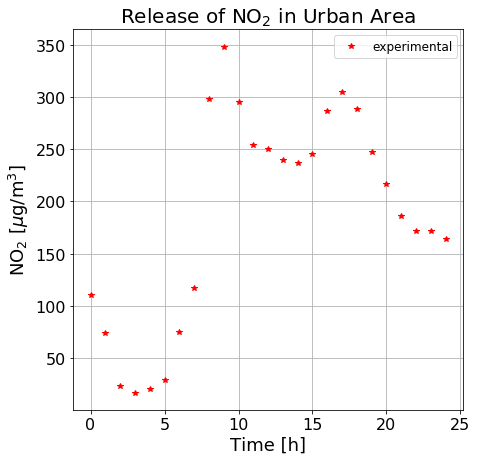

In [5]:
'''Plot experimental data'''
plot_experimental_data(time_expt, no2_mass_cc_expt)

## Linear System<a id="ls"></a>
Let's build the matrix system $\Amtrx\,\xvec = \bvec$

where $\Amtrx =  \begin{pmatrix}
1 & \cos(\mu\,t_1) & \sin(\mu\,t_1) & \cos(2\mu\,t_1) & \sin(2\mu\,t_1) & \ldots & \cos(N\mu\,t_1) & \sin(N\mu\,t_1)  \\
1 & \cos(\mu\,t_2) & \sin(\mu\,t_2) & \cos(2\mu\,t_2) & \sin(2\mu\,t_2) & \ldots & \cos(N\mu\,t_2) & \sin(N\mu\,t_2)  \\
\vdots  & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
1 & \cos(\mu\,t_m) & \sin(\mu\,t_m) & \cos(2\mu\,t_m) & \sin(2\mu\,t_m) & \ldots & \cos(N\mu\,t_m) & \sin(N\mu\,t_m)  \\
 \end{pmatrix}$, 
 $\xvec =  \begin{pmatrix}
  \alpha_0 \\ 
  \alpha_1 \\
  \beta_1 \\
  \vdots \\
  \alpha_N \\
  \beta_N \\ 
 \end{pmatrix}$, 
and 
$\bvec = \begin{pmatrix}
 b_1 \\ 
 b_2 \\ 
 \vdots  \\ 
 b_m \\ 
\end{pmatrix} $.

In [6]:
'''Build the matrix system'''

import math

period = np.max(time_expt)  # [h]
omega  = 1/period          # cycle frequency [1/h]
mu     = 2*math.pi * omega # radian frequency [rad/h]

n_pairs = 3

try:
    from chen_3170.toolkit import build_fourier_linear_system
except ModuleNotFoundError:
    assert False, 'You need to provide your own function to build the linear system. Bailing out.'

(a_mtrx, b_vec) = build_fourier_linear_system( mu, n_pairs, time_expt, no2_mass_cc_expt )

try:    
    from chen_3170.toolkit import matrix_rank   
except ModuleNotFoundError:
    assert False, 'You need to provide your own matrix_rank function here. Bailing out.'

rank = matrix_rank(a_mtrx)
print('My rank(A) =',rank)
print('NumPy rank(A) =',np.linalg.matrix_rank(a_mtrx))

assert rank == 2*n_pairs+1,'The LS normal matrix is rank deficient; matrix shape: (%r,%r), rank = %r'%(a_mtrx.shape[0],a_mtrx.shape[1],rank)

My rank(A) = 7
NumPy rank(A) = 7


## LS Data Fitting w/ Fourier Basis Functions<a id="lsdf"></a>

Let's build the LS normal equations and solve

\begin{equation*}
\Amtrx^\top\Amtrx\,\xvec_\text{LS}  = \Amtrx^\top\,\bvec .
\end{equation*}

The least squares solution $\xvec_\text{LS}$ gives the optimal values of the Fourier modes, $\alpha_k\,\cos(k\,\mu\,t)$ and $\beta_k\,\sin(k\,\mu\,t)$.

In [7]:
'''Solve the normal equations for the Fourier amplitudes'''

try:    
    from chen_3170.toolkit import solve   
except ModuleNotFoundError:
    assert False, 'You need to provide your own solve function here. Bailing out.'
    
x_vec = solve( a_mtrx.transpose()@a_mtrx, a_mtrx.transpose()@b_vec, pivoting_option='partial' )
print('x_vec =',x_vec)

print('||x_vec - NumPy x_vec|| = %1.3e'%np.linalg.norm(x_vec - np.linalg.solve(a_mtrx.transpose()@a_mtrx,a_mtrx.transpose()@b_vec)))

x_vec = [189.   -93.96 -73.24   1.28 -58.44  36.84  25.47]
||x_vec - NumPy x_vec|| = 2.010e-14


In [8]:
'''Function: plot the LS Fourier fit and all modes'''

def plot_fourier_fit(time_expt, no2_mass_cc_expt, mu, n_pairs, x_vec):
    
    import matplotlib.pyplot as plt
    
    plt.figure(2, figsize=(7,7))

    # plot experimental data
    plt.plot(time_expt, no2_mass_cc_expt,'r*',label='experimental')

    # plot LS Fourier fitting
    n_plot_pts = 100
    
    time_plot = np.linspace(time_expt[0], time_expt[-1], n_plot_pts)
    
    (a_mtrx, dummy) = build_fourier_linear_system(mu, n_pairs, time_plot, np.zeros(time_plot.size) )
    
    no2_mass_cc_plot = a_mtrx @ x_vec
    
    plt.plot( time_plot, no2_mass_cc_plot,'b--',label='LS Fourier fitting' )

    # Setup legend: create color labels for all basis functions
    from chen_3170.help import color_map
    colors = color_map(a_mtrx.shape[1]) # first column will be assigned black color
    
    for j in range(a_mtrx.shape[1]): # loop over basis functions (columns of A)

        color = colors[j]
        
        if j == 0:
            color='black'
            k = 0
            label=r'$\alpha_{%i}$=%4.2e'%(k,x_vec[j])
        elif j%2 == 0:
            k = j/2
            label=r'$\beta_{%i}$(=%4.2e) sin($%i\mu t$)'%(k,x_vec[j],k)
        else:
            k = (j+1)/2
            label=r'$\alpha_{%i}$(=%4.2e) cos($%i\mu t$)'%(k,x_vec[j],k)
        
        vertical_offset = 50 # [ug/m3] to improve visibility of modes
        if j == 0:
            vertical_offset = 0
        
        plt.plot( time_plot, x_vec[j]*a_mtrx[:,j]-vertical_offset, label=label, color=color)
        
    plt.xlabel(r'Time [h]',fontsize=18)
    plt.ylabel(r'NO$_2$ [$\mu$g/m$^3$]',fontsize=18)
    plt.title('Release of NO$_2$ in Urban Area',fontsize=20)

    (x_min,x_max) = plt.xlim()
    dx = abs(x_max-x_min)
    x_text = x_min + dx*0.25
    
    (y_min,y_max) = plt.ylim()
    dy = abs(y_max-y_min)
    y_text = y_min + dy*0.02
    
    plt.text(x_text, y_text, 
             r'$\mu=$%8.2e [rad/h],   $N$=%i'%
             (mu,n_pairs),fontsize=16)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    # Position the legend outside the plot; to the right side
    plt.legend(loc='upper right',bbox_to_anchor=(1.55, 1),fontsize=12)
    
    plt.grid(True)
    plt.show()
    print('')
    return

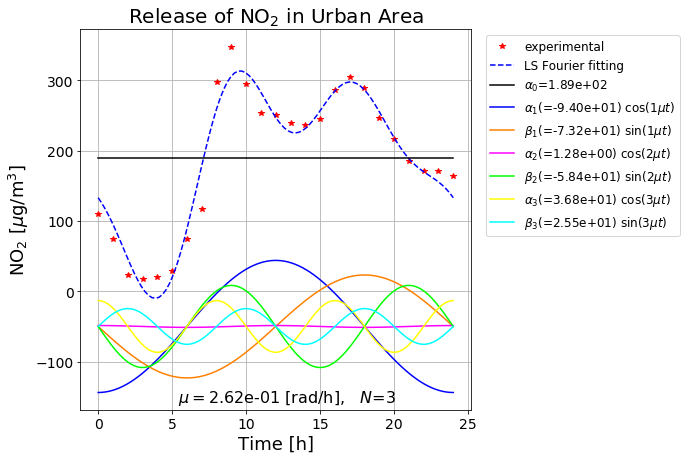

In [9]:
'''Plot the LS Fourier fit'''

plot_fourier_fit(time_expt, no2_mass_cc_expt, mu,n_pairs, x_vec)

## Modal Analysis<a id="modal"></a>

Vary the number of modes to observe the quality of fitting. There is much to investigate here but in this course we will be limited to an *eyeball* analysis and investigation of the rank of $\Amtrx$ as the Fourier basis increases in size.

## Power Spectrum<a id="spectrum"></a>

Power spectrum is the average amplitude of the modes as a function of frequency or the Fourier transform of the data. Compute the power as follows

\begin{equation*}
P(\omega_k) := \frac{\sqrt{\alpha_k^2 + \beta_k^2}}{2}
\end{equation*}

where the cycle frequency for each mode is 

\begin{equation*}
\omega_k := k\,\frac{\mu}{2\pi}
\end{equation*}


In [ ]:
'''Function: plot the power spectrum (Fourier transform)'''

def plot_power_spectrum(period,mu, n_pairs, x_vec):
    
    import matplotlib.pyplot as plt
    
    fig, ax = plt.subplots(figsize=(10,5))
    
    import numpy as np
    assert x_vec.size == 2*n_pairs + 1

    power = np.zeros(n_pairs+1)
    power[0] = x_vec[0]  # alpha_0
    
    import math
    
    for k in range(1,n_pairs+1): # exclude k = 0

        beta_id  = 2*k
        alpha_id = beta_id - 1
        
        alpha = x_vec[alpha_id]
        beta  = x_vec[beta_id]
        
        power[k] = math.sqrt( (alpha**2 + beta**2)/ 4 ) 
        
    plt.bar( range(power.size), power, color='orange', width=0.25 )
    
    #if power.size == 2:
        #plt.bar( range(power.size), power, color='orange', width=0.25 )
    #else:
        #plt.bar( list(range(power.size))[1:], power[1:], 
                 #color='orange', width=0.5 )
    
    ax.set_ylabel('Power [$\mu$g/m$^3$]',fontsize=18)
    ax.set_xlabel('Cycle Frequency ($\omega_k=k\,\mu/2\pi$) [cycles/day]',fontsize=18)
    ax.xaxis.grid( True, linestyle='-', which='major', color='lightgrey',alpha=0.9)
    fig.suptitle('Power Spectrum $N=$%i'%n_pairs, fontsize=20)
    plt.show()

    print('')
    return

In [ ]:
plot_power_spectrum(period, mu, n_pairs, x_vec)

In [ ]:
'''Vary the number of pairs of cosine-sine basis functions'''

for n_pairs in range(1,13,2):

    (a_mtrx, b_vec) = build_fourier_linear_system( mu, n_pairs, time_expt, no2_mass_cc_expt )
    #print('A shape =',a_mtrx.shape)
    
    rank = matrix_rank(a_mtrx)
    assert rank == np.linalg.matrix_rank(a_mtrx)
    print('rank(A) =',rank)
    assert rank == 2*n_pairs+1,'The LS normal matrix is rank deficient; matrix shape: (%r,%r), rank = %r'%(a_mtrx.shape[0],a_mtrx.shape[1],rank)
    
    x_vec = solve( a_mtrx.transpose()@a_mtrx, a_mtrx.transpose()@b_vec, pivoting_option='partial' )
    #print('x_vec =',x_vec)

    print('||x_vec - NumPy x_vec|| = %1.3e'%np.linalg.norm(x_vec - np.linalg.solve(a_mtrx.transpose()@a_mtrx,a_mtrx.transpose()@b_vec)))
    
    plot_fourier_fit(time_expt, no2_mass_cc_expt, mu,n_pairs, x_vec)
    plot_power_spectrum(period,mu, n_pairs, x_vec)

## Interactive Results <a id="ires"></a>

In [ ]:
'''Create interactive plot'''
#from plotly import __version__
#print( __version__) # requires version >= 3.4.0

import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools

fig = go.FigureWidget()
fig = tools.make_subplots(rows=3, cols=1, print_grid=False)

layout = go.Layout(title='$\\text{Release of NO}_2\ \\text{in Urban Area}$', 
         xaxis={'title':'Time [h]'}, 
         yaxis=dict(side='left',title='$\\text{NO}_2 [\\mu \\text{g}/ \\text{m}^3]$',anchor='x'),
         xaxis2={'title':'Time [h]'}, 
         yaxis2=dict(side='left',title='$\\text{NO}_2 [\\mu \\text{g}/ \\text{m}^3]$',anchor='x2'),
         xaxis3={'title':'Mode'}, 
         yaxis3=dict(side='left',title='$\\text{Power} [\\mu \\text{g}/ \\text{m}^3]$',anchor='x3')
                )

fig.layout.titlefont.size = 22
fig.layout.titlefont.family = 'Rockwell'

In [ ]:
'''Vary number of modes'''

from ipywidgets import interact
@interact( n_modes=(1, 11, 1), select=['LS Fourier Fit','LS Fourier Modes','Spectrum','All'] )
def update(n_modes=1, select='LS Fourier Fit'):
    with fig.batch_update():
       
        #a_mtrx = build_fourier_matrix( mu, n_modes, time_expt )
        (a_mtrx, b_vec) = build_fourier_linear_system( mu, n_modes, time_expt, no2_mass_cc_expt )
        
        x_vec  = np.linalg.solve( a_mtrx.transpose()@a_mtrx, a_mtrx.transpose()@b_vec )
        
        def plotly_experimental_data(fig):
            # plot experimental data
            scatt = fig.add_scatter(name="Exp't",mode='markers')
            scatt.x = time_expt
            scatt.y = no2_mass_cc_expt
            scatt.xaxis='x'
            scatt.yaxis='y'
            scatt.marker.color='red'
            scatt.marker.symbol='star'
            scatt.marker.size=10
            fig.append_trace(scatt, 1, 1)
            fig['layout']['xaxis'].update(title='Time [h]', showgrid=True)
            fig['layout']['yaxis'].update(title='$\\text{NO}_2\\ [\\mu \\text{g}/ \\text{m}^3]$', showgrid=True)
            fig['layout'].update(title='$\\text{Release of NO}_2\\ \\text{in Urban Area}$')
            return
        
        def plotly_fourier_fit(fig,modes=False,row=1):
            
            if row==1:
                xaxis = 'xaxis'
                yaxis = 'yaxis'
            elif row==2:
                xaxis = 'xaxis2'
                yaxis = 'yaxis2'
            else:
                assert False, 'not available.'
            
            # plot LS Fourier fitting 
            n_plot_pts = 180
            time_plot = np.linspace(time_expt[0],time_expt[-1],n_plot_pts)
            dummy = 0
            #(a_mtrx,dummy) = build_fourier_linear_system( mu, n_modes, time_plot )
            (a_mtrx, dummy) = build_fourier_linear_system(mu, n_modes, time_plot, np.zeros(time_plot.size) )
            no2_mass_cc_plot = a_mtrx @ x_vec
            
            if modes == False:
                scatt = fig.add_scatter(name='LSF Fit',mode='lines')
                scatt.line.color = 'blue'
                scatt.x = time_plot
                scatt.y = no2_mass_cc_plot
                
                if row==1:
                    scatt.xaxis='x'
                    scatt.yaxis='y'
                elif row==2:
                    scatt.xaxis='x2'
                    scatt.yaxis='y2'
                else:
                    assert False, 'not available.'
                     
                fig.append_trace(scatt, row, 1)
                fig['layout'].update(title='$\\text{Release of NO}_2\\ \\text{in Urban Area}$')
                fig['layout'][xaxis].update(title='Time [h]', showgrid=True)
                fig['layout'][yaxis].update(title='$\\text{NO}_2\\ [\\mu \\text{g}/ \\text{m}^3]$', showgrid=True)
                
                return
            
            import matplotlib.pyplot as plt
            color_ids = np.linspace(0,1,a_mtrx.shape[1])
            for (j,color_id) in zip(range(a_mtrx.shape[1]),color_ids):
                               
                color=plt.cm.nipy_spectral(color_id)
                red_channel   = str(int(color[0]*255))
                green_channel = str(int(color[1]*255))
                blue_channel  = str(int(color[2]*255))
                color='rgb('+red_channel+','+green_channel+','+blue_channel+')'
        
                if j == 0:
                    color='black'
                    k = 0
                    label='$\\alpha_'+str(int(k))+'='+str(round(x_vec[j],1))+'$'
                elif j%2 == 0:
                    k = j/2
                    label ='$\\beta_'+str(int(k))+'(='+str(round(x_vec[j],1))+')\\sin(\\mu t)$'
                else:
                    k = (j+1)/2
                    label ='$\\alpha_'+str(int(k))+'(='+str(round(x_vec[j],1))+')\\cos(\\mu t)$'
        
                vertical_offset = 0 # to improve visibility of modes
                if j == 0:
                    vertical_offset = 0
        
                scatt = fig.add_scatter(name=label)
                scatt.line.color = color
                
                scatt.x = time_plot
                scatt.y = x_vec[j]*a_mtrx[:,j]-vertical_offset

                if row==1:
                    scatt.xaxis='x'
                    scatt.yaxis='y'
                elif row==2:
                    scatt.xaxis='x2'
                    scatt.yaxis='y2'
                else:
                    assert False, 'not available.'
                
                fig.append_trace(scatt, row, 1)
                fig['layout'].update(title='Fourier Modes')
                fig['layout'][xaxis].update(title='Time [h]', showgrid=True)
                fig['layout'][yaxis].update(title='$\\text{NO}_2\\ [\\mu \\text{g}/ \\text{m}^3]$', showgrid=True)
                
            return
        
        def plotly_power_spectrum(fig,row=1):
            
            if row == 1:
                xaxis = 'xaxis'
                yaxis = 'yaxis'
            elif row == 2:
                xaxis = 'xaxis2'
                yaxis = 'yaxis2'
            elif row == 3:
                xaxis = 'xaxis3'
                yaxis = 'yaxis3'
            else:
                assert False
            
            import matplotlib.pyplot as plt
            
            import numpy as np
            power = np.zeros( int((x_vec.size-1)/2) + 1 )
            power[0] = x_vec[0]
    
            import math
    
            for k in range(power.size):
                if k == 0:
                    continue
                beta_id  = 2*k
                alpha_id = beta_id - 1
        
                alpha = x_vec[alpha_id]
                beta  = x_vec[beta_id]
        
                power[k] = math.sqrt( (alpha**2 + beta**2)/ 4 )  
               
            scatt = fig.add_bar(name='Power')
            
            scatt.x = np.array(list(range(power.size))[1:])
            scatt.y = power[1:]
            
            if row == 1:
                scatt.xaxis='x'
                scatt.yaxis='y'
            elif row == 2:
                scatt.xaxis='x2'
                scatt.yaxis='y2'
            elif row == 3:
                scatt.xaxis='x3'
                scatt.yaxis='y3'
            else:
                assert False
            
            fig.append_trace(scatt, row, 1)
            
            fig['layout'].update(title='Power Spectrum')
            fig['layout'][xaxis].update(title='Mode [k]', showgrid=True)
            fig['layout'][yaxis].update(title='$\\text{Power}\\ [\\mu \\text{g}/ \\text{m}^3]$', showgrid=True)   
                
    #ax.set_ylabel('Power [$\mu$g/m$^3$]',fontsize=18)
    #ax.set_xlabel('Cycle Frequency ($k=T\omega_k=k\mu/(2\pi)$) [cycles/day]',fontsize=18)
    #ax.xaxis.grid( True, linestyle='-', which='major', color='lightgrey',alpha=0.9)
    #fig.suptitle('Power Spectrum $N=$%i'%k, fontsize=20)
        
        if select == 'LS Fourier Fit':
            
            fig.data = [] # clear the data stack
                
            # plot experimental data
            plotly_experimental_data(fig)
           
            # plot LS Fourier fitting 
            plotly_fourier_fit(fig)
      
        elif select == 'LS Fourier Modes':
            
            fig.data = [] # clear the data stack
           
            # plot LS Fourier fitting 
            plotly_fourier_fit(fig,modes=True)
            
        elif select == 'Spectrum':
            
            fig.data = [] # clear the data stack
            
            # plot power spectrum
            plotly_power_spectrum(fig)
        
        elif select == 'All':
            
            fig.data = [] # clear the data stack
           
            # plot LS Fourier fitting without modes
            plotly_fourier_fit(fig)
            
            # plot LS Fourier fitting with modes
            plotly_fourier_fit(fig,modes=True,row=2)
            
            # plot power spectrum
            plotly_power_spectrum(fig,row=3)
            
            # plot experimental data
            plotly_experimental_data(fig)
            
        else:
            assert False, 'no other option; bail out'
            
    fig['layout'].update(height=1000, width=970) 
    
    plotly.offline.iplot(fig)
    
    return

#plotly.offline.plot(fig, include_plotlyjs=False, output_type='div')